# Imports

In [80]:
##Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sb
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn import metrics as m

%matplotlib inline

# Constants

In [81]:
##Variables
dsRed = pd.read_csv("winequality-red.csv",';')
dsWhite = pd.read_csv("winequality-white.csv", ';')

# Red Inspect

In [82]:
##Red inspect
print(dsRed.shape)
dsRed.head(1)

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [83]:
print(dsRed.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [84]:
duplicate_rows = dsRed[dsRed.duplicated()]
print ("number of duplicate rows: ", duplicate_rows.shape)

number of duplicate rows:  (240, 12)


In [85]:
dsRed = dsRed.drop_duplicates()
dsRed.count()

fixed acidity           1359
volatile acidity        1359
citric acid             1359
residual sugar          1359
chlorides               1359
free sulfur dioxide     1359
total sulfur dioxide    1359
density                 1359
pH                      1359
sulphates               1359
alcohol                 1359
quality                 1359
dtype: int64

In [86]:
y = dsRed['quality'].values
dsRed = dsRed.drop(['quality'], axis=1)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.255124     0.667437   
volatile acidity          -0.255124          1.000000    -0.551248   
citric acid                0.667437         -0.551248     1.000000   
residual sugar             0.111025         -0.002449     0.143892   
chlorides                  0.085886          0.055154     0.210195   
free sulfur dioxide       -0.140580         -0.020945    -0.048004   
total sulfur dioxide      -0.103777          0.071701     0.047358   
density                    0.670195          0.023943     0.357962   
pH                        -0.686685          0.247111    -0.550310   
sulphates                  0.190269         -0.256948     0.326062   
alcohol                   -0.061596         -0.197812     0.105108   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.111025   0.085886            -0.140580   
volatile acidit

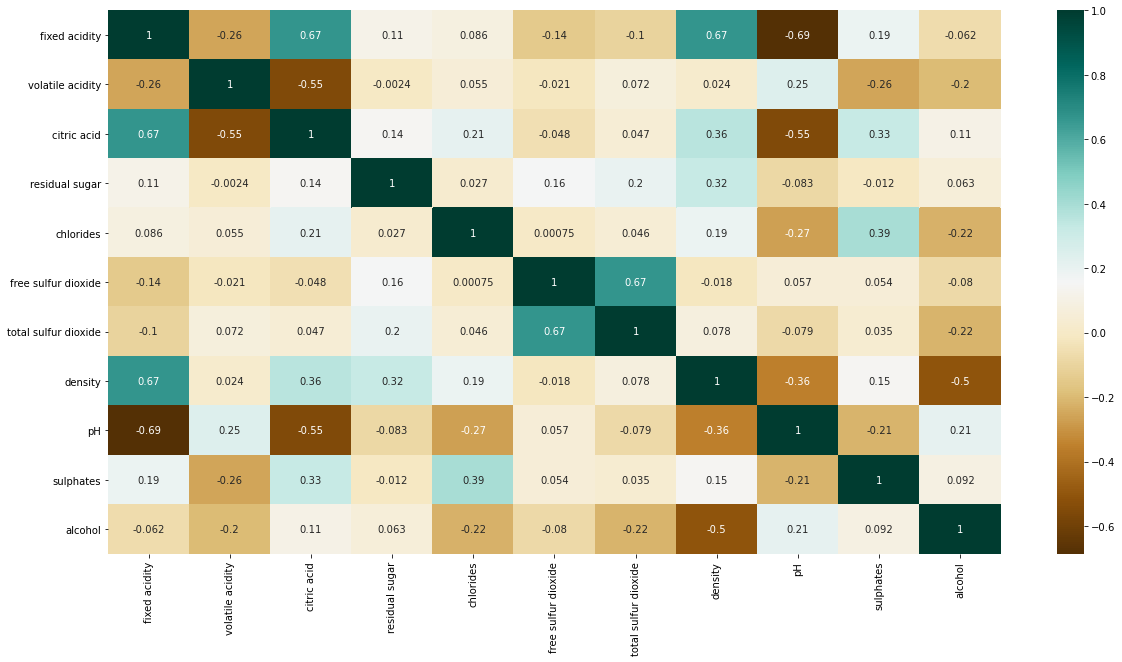

In [87]:
plt.figure(figsize=(20,10))
corl= dsRed.corr()
sb.heatmap(corl,cmap="BrBG",annot=True)
print (corl)

# RED Train

In [88]:
x = dsRed
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [89]:
print (y[0:5])

[5 5 5 6 5]


In [90]:
x_train, x_test, y_train, y_test = tts(x, y,test_size=0.20, random_state=0)
print (x_train.shape)

(1087, 11)


In [91]:
clf = dtc()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

In [92]:
#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",m.accuracy_score(y_test, y_pred))

Accuracy: 0.4742647058823529


# Red Render